# **Previous Notebooks**

https://www.kaggle.com/vexxingbanana/sartorius-coco-dataset-notebook

https://www.kaggle.com/vexxingbanana/sartorius-mmdetection-training

# **References**

https://www.kaggle.com/dschettler8845/sartorius-segmentation-eda-and-baseline

https://www.kaggle.com/ihelon/cell-segmentation-run-length-decoding

https://www.kaggle.com/stainsby/fast-tested-rle

https://www.kaggle.com/paulorzp/run-length-encode-and-decode

https://www.kaggle.com/awsaf49/sartorius-mmdetection-infer

https://www.kaggle.com/awsaf49/sartorius-mmdetection-train

https://www.kaggle.com/evancofsky/sartorius-torch-lightning-mask-r-cnn/notebook

# **Install MMDetection**

In [1]:
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl' --no-deps
!pip install '/kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl' --no-deps

Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torch-1.7.0+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torch
    Found existing installation: torch 1.9.1
    Uninstalling torch-1.9.1:
      Successfully uninstalled torch-1.9.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchvision-0.8.1+cu110-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.1
    Uninstalling torchvision-0.10.1:
      Successfully uninstalled torchvision-0.10.1
Processing /kaggle/input/pytorch-170-cuda-toolkit-110221/torchaudio-0.7.0-cp37-cp37m-linux_x86_64.whl
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.9.1
    Uninstalling torchaudio-0.9.1:
      Successfully uninstalled torchaudio-0.9.1


In [2]:
!pip install '/kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl' --no-deps
#!pip install '/kaggle/input/mmdetectionv2140/mmcv_full-1_3_8-cu110-torch1_7_0/mmcv_full-1.3.8-cp37-cp37m-manylinux1_x86_64.whl' --no-deps
!pip install '/kaggle/input/mmcvfull1317/mmcv_full-1.3.17-cp37-cp37m-manylinux1_x86_64.whl' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2' --no-deps
!pip install '/kaggle/input/mmdetectionv2140/mmpycocotools-12.0.3/mmpycocotools-12.0.3' --no-deps

Processing /kaggle/input/mmdetectionv2140/addict-2.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/yapf-0.31.0-py2.py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminal-0.4.0-py3-none-any.whl
Processing /kaggle/input/mmdetectionv2140/terminaltables-3.1.0-py3-none-any.whl
Processing /kaggle/input/mmcvfull1317/mmcv_full-1.3.17-cp37-cp37m-manylinux1_x86_64.whl
Processing /kaggle/input/mmdetectionv2140/pycocotools-2.0.2/pycocotools-2.0.2
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=272226 sha256=e35182c2e007bec9a70abc64738404

In [3]:
# !rm -rf mmdetection

# !cp -r /kaggle/input/mmdetectionv2140/mmdetection-2.14.0 /kaggle/working/
# !mv /kaggle/working/mmdetection-2.14.0 /kaggle/working/mmdetection
# %cd /kaggle/working/mmdetection
# !pip install -e .

In [4]:
!rm -rf mmdetection

!cp -r /kaggle/input/mmdet218/mmdetection-master /kaggle/working/
!cp -r /kaggle/input/qyl-config/ /kaggle/working/mmdetection-master
!mv /kaggle/working/mmdetection-master /kaggle/working/mmdetection
%cd /kaggle/working/mmdetection
!pip install -e .

/kaggle/working/mmdetection
Obtaining file:///kaggle/working/mmdetection
  Running setup.py develop for mmdet


# **Import Libraries**

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.nn.functional as F
import sklearn
import torchvision
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import cupy as cp
import gc
import pandas as pd
import os
import matplotlib.pyplot as plt
import PIL
import json
from PIL import Image, ImageEnhance
import albumentations as A
import mmdet
import mmcv
from albumentations.pytorch import ToTensorV2
import seaborn as sns
import glob
from pathlib import Path
import pycocotools
from pycocotools import mask
import numpy.random
import random
import cv2
import re
import shutil
from mmdet.datasets import build_dataset
from mmdet.models import build_detector
from mmdet.apis import train_detector
from mmdet.apis import inference_detector, init_detector, show_result_pyplot, set_random_seed

In [6]:
%cd ..

/kaggle/working


# **Helper Functions**

In [7]:
IMG_WIDTH = 704
IMG_HEIGHT = 520

In [8]:
import cupy as cp
import gc

def one_hot(y, num_classes, dtype=cp.uint8): # GPU
    y = cp.array(y, dtype='int')
    input_shape = y.shape
    if input_shape and input_shape[-1] == 1 and len(input_shape) > 1:
        input_shape = tuple(input_shape[:-1])
    y = y.ravel()
    if not num_classes:
        num_classes = cp.max(y) + 1
    n = y.shape[0]
    categorical = cp.zeros((n, num_classes), dtype=dtype)
    categorical[cp.arange(n), y] = 1
    output_shape = input_shape + (num_classes,)
    categorical = cp.reshape(categorical, output_shape)
    return categorical

def fix_overlap(msk): # GPU
    """
    Args:
        mask: multi-channel mask, each channel is an instance of cell, shape:(520,704,None)
    Returns:
        multi-channel mask with non-overlapping values, shape:(520,704,None)
    """
    msk = cp.array(msk)
    msk = cp.pad(msk, [[0,0],[0,0],[1,0]]) # add dummy mask for background
    ins_len = msk.shape[-1]
    msk = cp.argmax(msk,axis=-1)# convert multi channel mask to single channel mask, argmax will remove overlap
    msk = one_hot(msk, num_classes=ins_len) # back to multi-channel mask, some instance might get removed
    msk = msk[...,1:] # remove background mask
    msk = msk[...,cp.any(msk, axis=(0,1))] # remove all-zero masks
    #assert np.prod(msk, axis=-1).sum()==0 # overlap check, will raise error if there is overlap
    return msk

def check_overlap(msk):
    msk = msk.astype(cp.bool).astype(cp.uint8) # binary mask
    return cp.any(cp.sum(msk, axis=-1)>1) # only one channgel will contain value

In [9]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

In [10]:
def rle_encoding(x):
    dots = np.where(x.flatten() == 1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b + 1, 0))
        run_lengths[-1] += 1
        prev = b
    return ' '.join(map(str, run_lengths))

In [11]:
def get_mask_from_result(result):
    d = {True : 1, False : 0}
    u,inv = np.unique(result,return_inverse = True)
    mk = cp.array([d[x] for x in u])[inv].reshape(result.shape)
#     print(mk.shape)
    return mk

In [12]:
def does_overlap(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            #import pdb; pdb.set_trace()
            #print("Found overlapping masks!")
            return True
    return False


def remove_overlapping_pixels(mask, other_masks):
    for other_mask in other_masks:
        if np.sum(np.logical_and(mask, other_mask)) > 0:
            print("Overlap detected")
            mask[np.logical_and(mask, other_mask)] = 0
    return mask

In [13]:
def get_img_and_mask(img_path, annotation, width, height):
    """ Capture the relevant image array as well as the image mask """
    img_mask = np.zeros((height, width), dtype=np.uint8)
    for i, annot in enumerate(annotation): 
        img_mask = np.where(rle_decode(annot, (height, width))!=0, i, img_mask)
    img = cv2.imread(img_path)[..., ::-1]
    return img[..., 0], img_mask

def plot_img_and_mask(img, mask, invert_img=True, boost_contrast=True):
    """ Function to take an image and the corresponding mask and plot
    
    Args:
        img (np.arr): 1 channel np arr representing the image of cellular structures
        mask (np.arr): 1 channel np arr representing the instance masks (incrementing by one)
        invert_img (bool, optional): Whether or not to invert the base image
        boost_contrast (bool, optional): Whether or not to boost contrast of the base image
        
    Returns:
        None; Plots the two arrays and overlays them to create a merged image
    """
    plt.figure(figsize=(20,10))
    
    plt.subplot(1,3,1)
    _img = np.tile(np.expand_dims(img, axis=-1), 3)
    
    # Flip black-->white ... white-->black
    if invert_img:
        _img = _img.max()-_img
        
    if boost_contrast:
        _img = np.asarray(ImageEnhance.Contrast(Image.fromarray(_img)).enhance(16))
        
    plt.imshow(_img)
    plt.axis(False)
    plt.title("Cell Image", fontweight="bold")
    
    plt.subplot(1,3,2)
    _mask = np.zeros_like(_img)
    _mask[..., 0] = mask
    plt.imshow(mask, cmap='rainbow')
    plt.axis(False)
    plt.title("Instance Segmentation Mask", fontweight="bold")
    
    merged = cv2.addWeighted(_img, 0.75, np.clip(_mask, 0, 1)*255, 0.25, 0.0,)
    plt.subplot(1,3,3)
    plt.imshow(merged)
    plt.axis(False)
    plt.title("Cell Image w/ Instance Segmentation Mask Overlay", fontweight="bold")
    
    plt.tight_layout()
    plt.show()

# **Model**

In [14]:
%%writefile /kaggle/working/mmdetection/qyl-config/swin_s.py
model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='SwinTransformer',
        embed_dims=96,
        depths=[2, 2, 18, 2],
        num_heads=[3, 6, 12, 24],
        window_size=7,
        mlp_ratio=4,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.2,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        with_cp=False,
        convert_weights=True,
        init_cfg=dict(
            type='Pretrained',
            checkpoint=None
            #'https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_small_patch4_window7_224.pth'
        )),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.0),
        loss_bbox=dict(type='L1Loss', loss_weight=1.0)),
    roi_head=dict(
        type='StandardRoIHead',
        bbox_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=7, sampling_ratio=0),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        bbox_head=dict(
            type='Shared2FCBBoxHead',
            in_channels=256,
            fc_out_channels=1024,
            roi_feat_size=7,
            num_classes=3,
            bbox_coder=dict(
                type='DeltaXYWHBBoxCoder',
                target_means=[0.0, 0.0, 0.0, 0.0],
                target_stds=[0.1, 0.1, 0.2, 0.2]),
            reg_class_agnostic=False,
            loss_cls=dict(
                type='CrossEntropyLoss', use_sigmoid=False, loss_weight=1.0),
            loss_bbox=dict(type='L1Loss', loss_weight=1.0)),
        mask_roi_extractor=dict(
            type='SingleRoIExtractor',
            roi_layer=dict(type='RoIAlign', output_size=14, sampling_ratio=0),
            out_channels=256,
            featmap_strides=[4, 8, 16, 32]),
        mask_head=dict(
            type='FCNMaskHead',
            num_convs=4,
            in_channels=256,
            conv_out_channels=256,
            num_classes=3,
            loss_mask=dict(
                type='CrossEntropyLoss', use_mask=True, loss_weight=1.0))),
    train_cfg=dict(
        rpn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.7,
                neg_iou_thr=0.3,
                min_pos_iou=0.3,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=256,
                pos_fraction=0.5,
                neg_pos_ub=-1,
                add_gt_as_proposals=False),
            allowed_border=-1,
            pos_weight=-1,
            debug=False),
        rpn_proposal=dict(
            nms_pre=2000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            assigner=dict(
                type='MaxIoUAssigner',
                pos_iou_thr=0.5,
                neg_iou_thr=0.5,
                min_pos_iou=0.5,
                match_low_quality=True,
                ignore_iof_thr=-1),
            sampler=dict(
                type='RandomSampler',
                num=512,
                pos_fraction=0.25,
                neg_pos_ub=-1,
                add_gt_as_proposals=True),
            mask_size=28,
            pos_weight=-1,
            debug=False)),
    test_cfg=dict(
        rpn=dict(
            nms_pre=1000,
            max_per_img=1000,
            nms=dict(type='nms', iou_threshold=0.7),
            min_bbox_size=0),
        rcnn=dict(
            score_thr=0.05,
            nms=dict(type='nms', iou_threshold=0.5),
            max_per_img=200,
            mask_thr_binary=0.5)))
dataset_type = 'CocoDataset'
data_root = './'
classes=('shsy5y','cort','astro')
img_norm_cfg = dict(
    mean=[123.675, 116.28, 103.53], std=[58.395, 57.12, 57.375], to_rgb=True)
train_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(type='LoadAnnotations', with_bbox=True, with_mask=True),
    dict(type='RandomFlip', flip_ratio=0.5),
    dict(
        type='AutoAugment',
        policies=[[{
            'type':
            'Resize',
            'img_scale': [(520, 704), (780, 1056), (1040, 1408)],
            'multiscale_mode':
            'value',
            'keep_ratio':
            True
        }],
                  [{
                      'type': 'Resize',
                      'img_scale': [(520, 704), (780, 1056), (1040, 1408)],
                      'multiscale_mode': 'value',
                      'keep_ratio': True
                  }, {
                      'type': 'RandomCrop',
                      'crop_type': 'absolute_range',
                      'crop_size': (384, 600),
                      'allow_negative_crop': True
                  }, {
                      'type':
                      'Resize',
                      'img_scale': [(520, 704), (780, 1056), (1040, 1408)],
                      'multiscale_mode':
                      'value',
                      'override':
                      True,
                      'keep_ratio':
                      True
                  }]]),
    
    dict(
        type='Albu',
        transforms=[
                #dict(type='ShiftScaleRotate', shift_limit=0.0625,
                #     scale_limit=0.15, rotate_limit=15, p=0.4),
                #dict(type='RandomBrightnessContrast', brightness_limit=0.2,
                #    contrast_limit=0.2, p=0.5),
                dict(type='IAAAffine', shear=(-10.0, 10.0), p=0.4),
                dict(type='CLAHE', p=0.5),
                dict(
                    type="OneOf",
                    transforms=[
                        dict(type="GaussianBlur", p=1.0, blur_limit=7),
                        dict(type="MedianBlur", p=1.0, blur_limit=7),
                    ],
                    p=0.5,
                ),
            ],
        bbox_params=dict(
        type='BboxParams',
        format='pascal_voc',
        label_fields=['gt_labels'],
        min_visibility=0.0,
        filter_lost_elements=True),
        keymap=dict(img='image', gt_bboxes='bboxes', gt_masks='masks'),
        update_pad_shape=False,
        skip_img_without_anno=True),
    dict(
        type='Normalize',
        mean=[123.675, 116.28, 103.53],
        std=[58.395, 57.12, 57.375],
        to_rgb=True),
    dict(type='Pad', size_divisor=32),
    dict(type='DefaultFormatBundle'),
    dict(type='Collect', keys=['img', 'gt_bboxes', 'gt_labels', 'gt_masks'])
]
test_pipeline = [
    dict(type='LoadImageFromFile'),
    dict(
        type='MultiScaleFlipAug',
        img_scale=[(910,1232),(1040,1408)],
        flip=True,
        transforms=[
            dict(type='Resize', keep_ratio=True),
            dict(type='RandomFlip'),
            dict(
                type='Normalize',
                mean=[123.675, 116.28, 103.53],
                std=[58.395, 57.12, 57.375],
                to_rgb=True),
            dict(type='Pad', size_divisor=32),
            dict(type='ImageToTensor', keys=['img']),
            dict(type='Collect', keys=['img'])
        ])
]
data = dict(
    samples_per_gpu=2,
    workers_per_gpu=2,
    train=dict(
        type=dataset_type,
        ann_file='../code/train_dataset.json',
        img_prefix='',
        classes=classes,
        pipeline=train_pipeline),
    val=dict(
        type=dataset_type,
        ann_file='../code/val_dataset.json',
        img_prefix='',
        classes=classes,
        pipeline=test_pipeline),
    test=dict(
        type=dataset_type,
        ann_file='../code/val_dataset.json',
        img_prefix='',
        classes=classes,
        pipeline=test_pipeline))
evaluation = dict(metric='segm', interval=1)#dict(interval=1000)
optimizer = dict(
    type='AdamW',
    lr=0.0001,
    betas=(0.9, 0.999),
    weight_decay=0.05,
    paramwise_cfg=dict(
        custom_keys=dict(
            absolute_pos_embed=dict(decay_mult=0.0),
            relative_position_bias_table=dict(decay_mult=0.0),
            norm=dict(decay_mult=0.0),
            head=dict(lr_mult=10.))))
optimizer_config = dict(grad_clip=None)
#
# lr_config = dict(
#     policy='step',
#     warmup='linear',
#     warmup_iters=100,
#     warmup_ratio=0.001,
#     step=[20, 30])
lr_config = dict(
    policy='poly',
    warmup='linear',
    warmup_iters=200,
    warmup_ratio=1e-06,
    power=1.0,
    min_lr=1e-06,
    by_epoch=True)
#
runner = dict(type='EpochBasedRunner', max_epochs=36)
checkpoint_config = dict(interval=1)
log_config = dict(interval=20, hooks=[dict(type='TextLoggerHook')])
custom_hooks = [dict(type='NumClassCheckHook')]
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from =None
resume_from = None
workflow = [('train', 1)]
pretrained = None#'https://github.com/SwinTransformer/storage/releases/download/v1.0.0/swin_small_patch4_window7_224.pth'
fp16 = dict(loss_scale=dict(init_scale=512))
work_dir = './work_dirs/swin_s_coco'
gpu_ids = [3]

Overwriting /kaggle/working/mmdetection/qyl-config/swin_s.py


In [15]:
from mmcv import Config
cfg = Config.fromfile('/kaggle/working/mmdetection/qyl-config/swin_s.py')

In [16]:
print(cfg.pretty_text)

model = dict(
    type='MaskRCNN',
    backbone=dict(
        type='SwinTransformer',
        embed_dims=96,
        depths=[2, 2, 18, 2],
        num_heads=[3, 6, 12, 24],
        window_size=7,
        mlp_ratio=4,
        qkv_bias=True,
        qk_scale=None,
        drop_rate=0.0,
        attn_drop_rate=0.0,
        drop_path_rate=0.2,
        patch_norm=True,
        out_indices=(0, 1, 2, 3),
        with_cp=False,
        convert_weights=True,
        init_cfg=dict(type='Pretrained', checkpoint=None)),
    neck=dict(
        type='FPN',
        in_channels=[96, 192, 384, 768],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 

In [17]:
cfg.classes = '/kaggle/working/labels.txt'

# **Inference**

In [18]:
confidence_thresholds = {0: 0.3, 1: 0.6, 2: 0.4}

In [19]:
segms = []
files = []

load checkpoint from local path: ../input/swin-epoch36/swin_epoch36-741a9bd3.pth


/kaggle/working/mmdetection/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


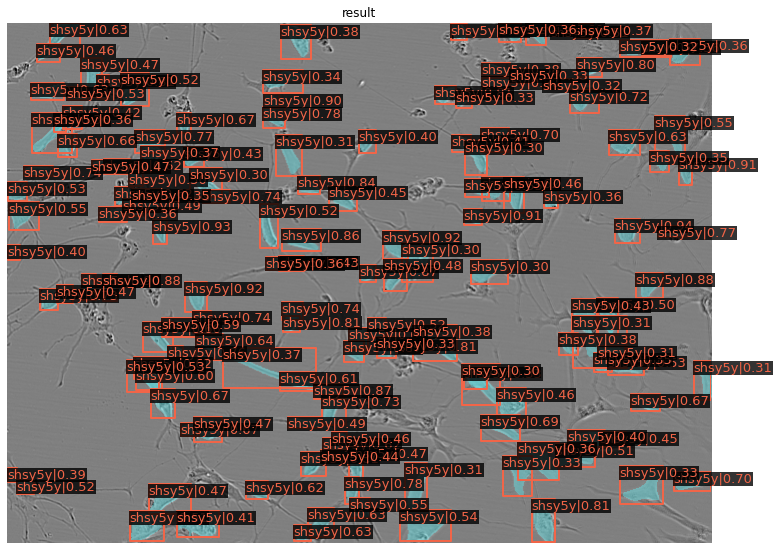

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


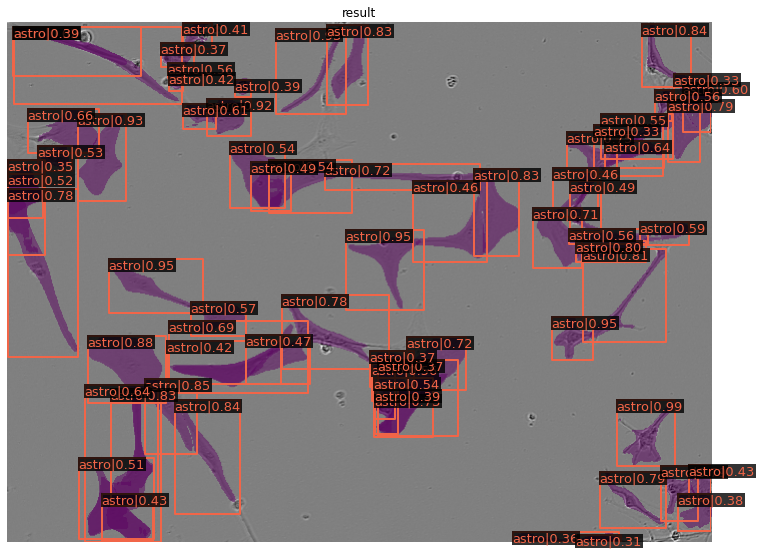

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


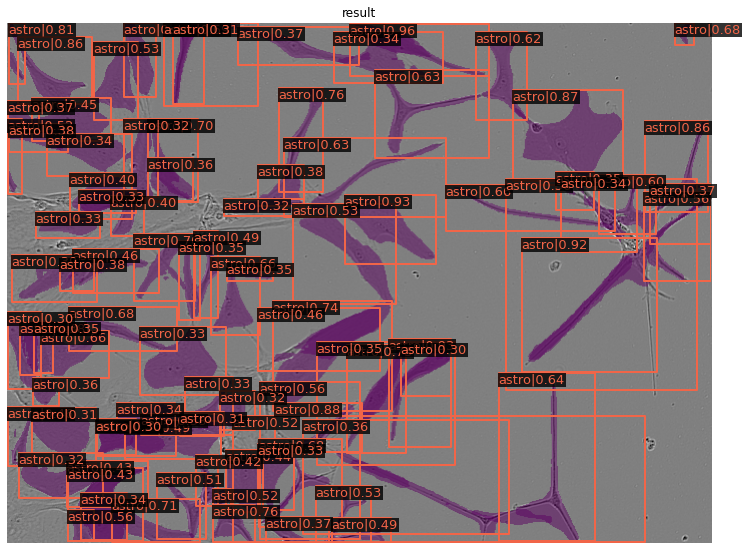

Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected
Overlap detected


In [20]:
model = init_detector(cfg, '../input/swin-epoch36/swin_epoch36-741a9bd3.pth')
for file in sorted(os.listdir('../input/sartorius-cell-instance-segmentation/test')):
    img = mmcv.imread('../input/sartorius-cell-instance-segmentation/test/' + file)
    result = inference_detector(model, img)
    show_result_pyplot(model, img, result)
    previous_masks = []
    for i, classe in enumerate(result[0]):
        if classe.shape != (0, 5):
            bbs = classe
#             print(bbs)
            sgs = result[1][i]
            for bb, sg in zip(bbs,sgs):
                box = bb[:4]
                cnf = bb[4]
                if cnf >= confidence_thresholds[i]:
                    mask = get_mask_from_result(sg)
                    mask = remove_overlapping_pixels(mask, previous_masks)
                    previous_masks.append(mask)
#                     previous_masks.append(cp.array(mask))

#     plt.imshow(previous_masks)
#     masks = np.stack(previous_masks, axis=-1)
#     masks = fix_overlap(masks)        
    for mk in previous_masks:
            rle_mask = rle_encoding(mk)
            segms.append(rle_mask)
            files.append(str(file.split('.')[0]))

In [21]:
indexes = []
for i, segm in enumerate(segms):
    if segm == '':
        indexes.append(i)

In [22]:
for element in sorted(indexes, reverse = True):
    del segms[element]
    del files[element]

In [23]:
files = pd.Series(files, name='id')
preds = pd.Series(segms, name='predicted')

In [24]:
preds

0      140004 14 140707 19 141410 22 142114 22 142818...
1      139542 3 140245 5 140948 7 141652 8 142356 9 1...
2      148932 5 149634 9 150336 11 151039 13 151742 1...
3      183220 4 183923 7 184627 8 185331 9 186035 10 ...
4      97122 5 97826 6 98529 8 99233 9 99937 9 100641...
                             ...                        
246    305773 13 306475 16 307168 28 307870 30 308573...
247    312711 6 313411 10 314112 13 314812 16 315509 ...
248    326764 1 327467 2 328171 1 328875 1 329579 1 3...
249    307840 4 308543 5 309247 6 309951 7 310656 6 3...
250    123327 4 124028 10 124730 13 125433 14 126135 ...
Name: predicted, Length: 251, dtype: object

In [25]:
submission_df = pd.concat([files, preds], axis=1)

In [26]:
submission_df.to_csv('submission.csv', index=False)

In [27]:
submission_df

,id,predicted
0,7ae19de7bc2a,140004 14 140707 19 141410 22 142114 22 142818...
1,7ae19de7bc2a,139542 3 140245 5 140948 7 141652 8 142356 9 1...
2,7ae19de7bc2a,148932 5 149634 9 150336 11 151039 13 151742 1...
3,7ae19de7bc2a,183220 4 183923 7 184627 8 185331 9 186035 10 ...
4,7ae19de7bc2a,97122 5 97826 6 98529 8 99233 9 99937 9 100641...
...,...,...
246,d8bfd1dafdc4,305773 13 306475 16 307168 28 307870 30 308573...
247,d8bfd1dafdc4,312711 6 313411 10 314112 13 314812 16 315509 ...
248,d8bfd1dafdc4,326764 1 327467 2 328171 1 328875 1 329579 1 3...
249,d8bfd1dafdc4,307840 4 308543 5 309247 6 309951 7 310656 6 3...


In [28]:
# lines = []
# for f in submission_df.itertuples():
#     lines.append('../input/sartorius-cell-instance-segmentation/test/' + f[1] + '.png')
# lins = pd.Series(lines, name='img_path')
# check_df = pd.concat([submission_df, lins], axis=1)

In [29]:
# tmp_df = check_df.drop_duplicates(subset=["id"]).reset_index(drop=True)
# tmp_df["predicted"] = check_df.groupby("id")["predicted"].agg(list).reset_index(drop=True)
# check_df = tmp_df.copy()

In [30]:
# check_df

In [31]:
# for f in check_df.itertuples():
#     im, mk = get_img_and_mask(f[3], f[2], IMG_WIDTH, IMG_HEIGHT)
#     plot_img_and_mask(im, mk)

In [32]:
shutil.rmtree('/kaggle/working/mmdetection')